# Bergerhoehle Energy Analysis

In [1]:
import pandas as pd
import sqlite3
from IPython.display import display
import matplotlib.pyplot as plt

conn = sqlite3.connect("energy.db")
df = pd.read_sql_query("select * from energy;", conn)
df.timestamp = pd.to_datetime(df.timestamp,unit='s')
df.index = df.timestamp
energy_per_day = df.groupby(pd.Grouper(freq='D')).count()*13.3333333

# Remove first day as it only has 2 hours
energy_per_day = energy_per_day.iloc[1:]

energy_per_day.columns = ["Wh"]

print("Energy consumption per day:")
display(energy_per_day)

Energy consumption per day:


,Wh
timestamp,
2018-11-06,13026.666634
2018-11-07,11026.666639
2018-11-08,12026.666637
2018-11-09,10173.333308
2018-11-10,8306.666646
2018-11-11,14519.999964
2018-11-12,7079.999982
2018-11-13,6493.333317
2018-11-14,8706.666645


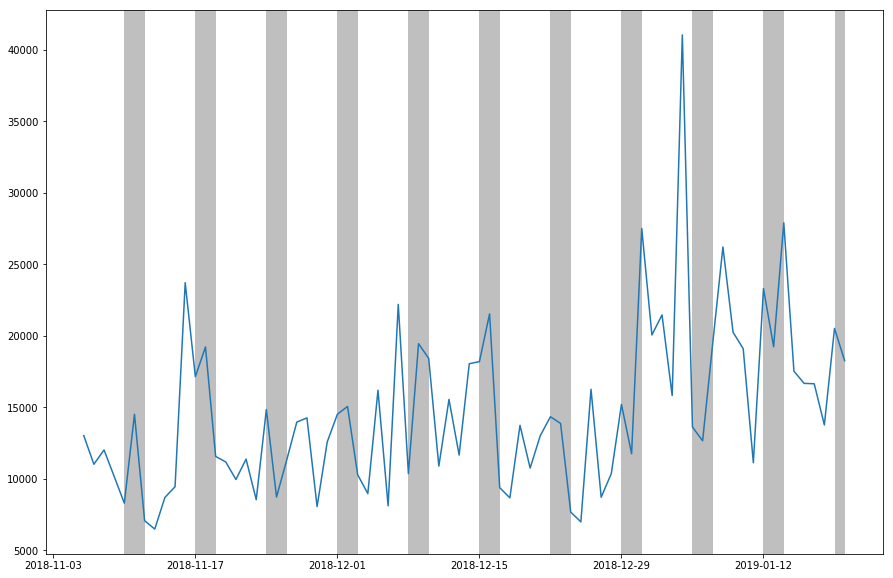

<Figure size 1080x720 with 0 Axes>

In [2]:
# Plot data
fig, ax = plt.subplots(figsize=(15,10))

# Mark weekends gray:
for i in range(len(energy_per_day.index)-1):
    if energy_per_day.index[i].weekday() >= 5:
        ax.axvspan(energy_per_day.index[i], energy_per_day.index[i + 1], facecolor='gray', edgecolor='none', alpha=.5)
ax.plot(energy_per_day)
plt.figure(figsize=(15,10))
plt.show()

In [3]:
import numpy as np

# Do we consume more energy on weekdays or on weekends?
weekend_mean = np.mean(energy_per_day[energy_per_day.index.weekday >= 5].values)
weekday_mean = np.mean(energy_per_day[energy_per_day.index.weekday < 5].values)
print("Mean power consumption per day during week: {}".format(weekday_mean))
print("Mean power consumption per day during weekend: {}".format(weekend_mean))
print("On weekdays, we consume {} percent less power than on weekends!".format(int((1 - (weekday_mean / weekend_mean))*100)))

Mean power consumption per day during week: 14356.543173985185
Mean power consumption per day during weekend: 15670.909051731816
On weekdays, we consume 8 percent less power than on weekends!


In [4]:
from sklearn.neural_network import MLPRegressor
import datetime
# Try to predict power consumption using a neural network:
# Add column with days since epoch:

energy_per_day["days"] = energy_per_day.index
energy_per_day.days = energy_per_day.days.apply(lambda x: (x - datetime.datetime(1970,1,1)).days)

display(energy_per_day.tail())

X = energy_per_day.days.values.reshape(-1,1)
y = energy_per_day.Wh

model = MLPRegressor(hidden_layer_sizes=(10,10,10)).fit(X,y)

,Wh,days
timestamp,,
2019-01-16,16679.999958,17912
2019-01-17,16653.333292,17913
2019-01-18,13773.333299,17914
2019-01-19,20519.999949,17915
2019-01-20,18266.666621,17916


In [5]:
display(energy_per_day.tail())
display(model.score(X,y))

days_to_predict = [[17917],[17918],[17919],[17920],[17921],[17922],[17923]]

prediction = model.predict(days_to_predict)

display(prediction)

,Wh,days
timestamp,,
2019-01-16,16679.999958,17912
2019-01-17,16653.333292,17913
2019-01-18,13773.333299,17914
2019-01-19,20519.999949,17915
2019-01-20,18266.666621,17916


-0.0027360809306666845

array([15208.63009062, 15209.47897448, 15210.32785833, 15211.17674219,
       15212.02562605, 15212.8745099 , 15213.72339376])

In [6]:
from sklearn.linear_model import LinearRegression
# Since the score is really bad, let's try linear regression:
reg = LinearRegression().fit(X,y)
print(reg.score(X,y))
display(reg.predict(days_to_predict))

0.20274235551171882


array([19380.2806533 , 19500.88489087, 19621.48912844, 19742.093366  ,
       19862.69760357, 19983.30184113, 20103.9060787 ])

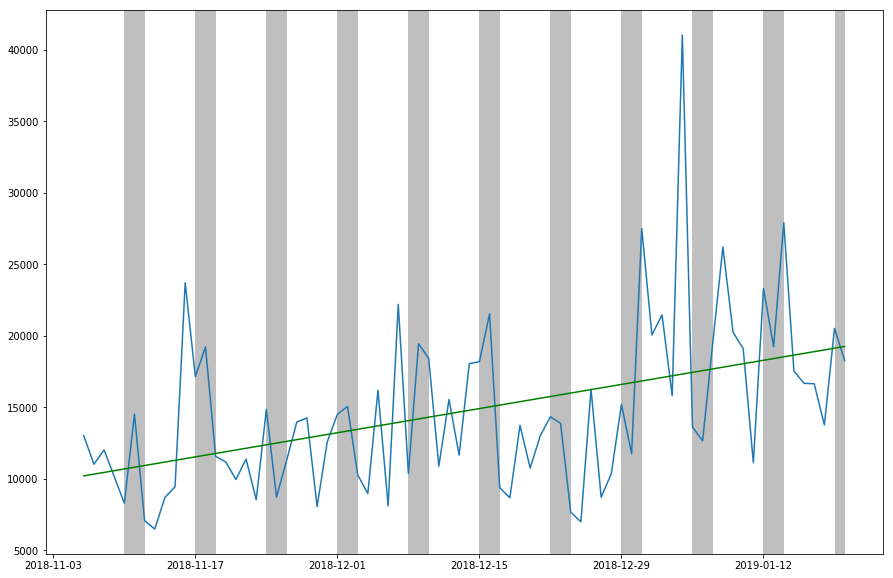

<Figure size 1080x720 with 0 Axes>

array([10214.3585983 , 10334.96283586, 10455.56707343, 10576.17131099,
       10696.77554856, 10817.37978613, 10937.98402369, 11058.58826126,
       11179.19249882, 11299.79673639, 11420.40097396, 11541.00521152,
       11661.60944909, 11782.21368665, 11902.81792422, 12023.42216178,
       12144.02639935, 12264.63063692, 12385.23487448, 12505.83911205,
       12626.44334961, 12747.04758718, 12867.65182475, 12988.25606231,
       13108.86029988, 13229.46453744, 13350.06877501, 13470.67301258,
       13591.27725014, 13711.88148771, 13832.48572527, 13953.08996284,
       14073.6942004 , 14194.29843797, 14314.90267554, 14435.5069131 ,
       14556.11115067, 14676.71538823, 14797.3196258 , 14917.92386337,
       15038.52810093, 15159.1323385 , 15279.73657606, 15400.34081363,
       15520.9450512 , 15641.54928876, 15762.15352633, 15882.75776389,
       16003.36200146, 16123.96623902, 16244.57047659, 16365.17471416,
       16485.77895172, 16606.38318929, 16726.98742685, 16847.59166442,
      

DatetimeIndex(['2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-10', '2018-11-11', '2018-11-12', '2018-11-13',
               '2018-11-14', '2018-11-15', '2018-11-16', '2018-11-17',
               '2018-11-18', '2018-11-19', '2018-11-20', '2018-11-21',
               '2018-11-22', '2018-11-23', '2018-11-24', '2018-11-25',
               '2018-11-26', '2018-11-27', '2018-11-28', '2018-11-29',
               '2018-11-30', '2018-12-01', '2018-12-02', '2018-12-03',
               '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07',
               '2018-12-08', '2018-12-09', '2018-12-10', '2018-12-11',
               '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15',
               '2018-12-16', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31',
      

In [7]:
# Plot data
fig2, ax2 = plt.subplots(figsize=(15,10))

# Mark weekends gray:
for i in range(len(energy_per_day.index)-1):
    if energy_per_day.index[i].weekday() >= 5:
        ax2.axvspan(energy_per_day.index[i], energy_per_day.index[i + 1], facecolor='gray', edgecolor='none', alpha=.5)
ax2.plot(energy_per_day.Wh)
energy_prediction = pd.DataFrame(reg.predict(X))
energy_prediction.index = energy_per_day.index
ax2.plot(energy_prediction, color='green')
plt.figure(figsize=(15,10))
plt.show()
display(reg.predict(X))
display(energy_per_day.index)

In [8]:
display(energy_per_day.head())
display(energy_prediction.head())

,Wh,days
timestamp,,
2018-11-06,13026.666634,17841
2018-11-07,11026.666639,17842
2018-11-08,12026.666637,17843
2018-11-09,10173.333308,17844
2018-11-10,8306.666646,17845


,0
timestamp,
2018-11-06,10214.358598
2018-11-07,10334.962836
2018-11-08,10455.567073
2018-11-09,10576.171311
2018-11-10,10696.775549
